Business problem: The company is experiencing a high rate of employee turnover. The HR department aims to identify the root causes of job resignations and implement strategies to prevent this problem in the future



Analytical problem: Based on the identified business problem, the following key analytical tasks were defined:

Research questions:

- What are the key characteristics of employees who have left the company?
- What is the attrition rate for different departments, employee groups, and job positions?
- What factors increase the probability of employee attrition?
- What factors decrease the probability of employee attrition?
- Which specific employees are at high risk of leaving their jobs?

Steps of the analytical process:

Data understanding:
- Number, type, and level of measurement of variables
- Checking variable names, labels, and values
- Identifying potential data quality issues

Data preparation:
- Handling outliers, duplicates, and missing values
- Discovering and fixing data errors
- Dropping redundant columns
- Transforming and partitioning data

Data analysis:
- Data visualization - distribution shape
- Descriptive statistics (overall and within subcategories)
- Attrition rate comparison
- Correlation analysis
- Comparison of arithmetic means (t-student test)

Key insights and conclusions

Recommendation for further analysis


1. Data Understanding

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
hr_data = pd.read_csv('./Data/HR_Analytics.csv')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
hr_data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [6]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
object_variables = hr_data.select_dtypes(include=['object'])

for variable in object_variables:
    print(f'Unique variable values for {variable}:')
    print(hr_data[variable].unique())
    print(f'Frequency distribution for {variable}:')
    print(hr_data[variable].value_counts())
    print('\n' + '-'* 50 + '\n')

Unique variable values for Attrition:
['Yes' 'No']
Frequency distribution for Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

--------------------------------------------------

Unique variable values for BusinessTravel:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Frequency distribution for BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

--------------------------------------------------

Unique variable values for Department:
['Sales' 'Research & Development' 'Human Resources']
Frequency distribution for Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

--------------------------------------------------

Unique variable values for EducationField:
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Frequency distribution for EducationField:
Educat

In [8]:
hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Data understanding summary: 
- Our dataset consists of 35 variables (columns) and 1470 cases (rows). 
- 26 variables are intiger type (numerical data)
- 9 variables are object type (categirical data - nominal and ordinal level of measurement). Unique values for categorical features were shown above.
- Attrition variable can be treated as a dependent (outcome) variable (frequency distribution of this feature: 'Yes': 237, 'No': 1233). The remaining columns can be treated as a independent (explanatory) variables. 
- Since we are analyzing the whole company data (population and not a sample), there's no need to use inferential statistics tools like hipothesis tests.   
- Variable description:
    - Age: The age of the employee. (Numerical)
    - Attrition: Whether or not the employee has left the organization. (Categorical)
    - BusinessTravel: The frequency of business travel for the employee. (Categorical)
    - DailyRate: The daily rate of pay for the employee. (Numerical)
    - Department: The department the employee works in. (Categorical)
    - DistanceFromHome: The distance from home in miles for the employee. (Numerical)
    - Education: The level of education achieved by the employee. (Categorical)
    - EducationField: The field of study for the employee's education. (Categorical)
    - EmployeeCount: The total number of employees in the organization. (Numerical)
    - EmployeeNumber: A unique identifier for each employee profile. (Numerical)
    - EnvironmentSatisfaction: The employee's satisfaction with their work environment. (Categorical)
    - Gender: The gender of the employee. (Categorical)
    - HourlyRate: The hourly rate of pay for the employee. (Numerical)
    - JobInvolvement: The level of involvement required for the employee's job. (Categorical)
    - JobLevel: The job level of the employee. (Categorical)
    - JobRole: The role of the employee in the organization. (Categorical)
    - JobSatisfaction: The employee's satisfaction with their job. (Categorical)
    - MaritalStatus: The marital status of the employee. (Categorical)
    - MonthlyIncome: The monthly income of the employee. (Numerical)
    - MonthlyRate: The monthly rate of pay for the employee. (Numerical)
    - NumCompaniesWorked: The number of companies the employee has worked for. (Numerical)
    - Over18: Whether or not the employee is over 18. (Categorical)
    - OverTime: Whether or not the employee works overtime. (Categorical)
    - PercentSalaryHike: The percentage of salary hike for the employee. (Numerical)
    - PerformanceRating: The performance rating of the employee. (Categorical)
    - RelationshipSatisfaction: The employee's satisfaction with their relationships. (Categorical)
    - StandardHours: The standard hours of work for the employee. (Numerical)
    - StockOptionLevel: The stock option level of the employee. (Numerical)
    - TotalWorkingYears: The total number of years the employee has worked. (Numerical)
    - TrainingTimesLastYear: The number of times the employee was taken for training in the last year. (Numerical)
    - WorkLifeBalance: The employee's perception of their work-life balance. (Categorical)
    - YearsAtCompany: The number of years the employee has been with the company. (Numerical)
    - YearsInCurrentRole: The number of years the employee has been in their current role. (Numerical)
    - YearsSinceLastPromotion: The number of years since the employee's last promotion. (Numerical)
    - YearsWithCurrManager: The number of years the employee has been with their current manager. (Numerical)

    


2. Data Preparation

Missing values

In [9]:
hr_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Duplicates

In [10]:
duplicates_sum = hr_data.duplicated().sum()
print(duplicates_sum)

0


Dropping columns with no substantive value or low variance/ standard deviation

In [11]:
numerical_variables = hr_data.select_dtypes(include=['int64'])

In [12]:
for variable in numerical_variables:
    print(f'Variance for {variable}:')
    variance = hr_data[variable].var()
    print(round(variance,2))
    print(f'Standard Deviation for {variable}:')
    standard_deviation = hr_data[variable].std()
    print(round(standard_deviation,2))
    print('\n' + '-'* 50 + '\n')

Variance for Age:
83.46
Standard Deviation for Age:
9.14

--------------------------------------------------

Variance for DailyRate:
162819.59
Standard Deviation for DailyRate:
403.51

--------------------------------------------------

Variance for DistanceFromHome:
65.72
Standard Deviation for DistanceFromHome:
8.11

--------------------------------------------------

Variance for Education:
1.05
Standard Deviation for Education:
1.02

--------------------------------------------------

Variance for EmployeeCount:
0.0
Standard Deviation for EmployeeCount:
0.0

--------------------------------------------------

Variance for EmployeeNumber:
362433.3
Standard Deviation for EmployeeNumber:
602.02

--------------------------------------------------

Variance for EnvironmentSatisfaction:
1.19
Standard Deviation for EnvironmentSatisfaction:
1.09

--------------------------------------------------

Variance for HourlyRate:
413.29
Standard Deviation for HourlyRate:
20.33

------------------

In [13]:
hr_data.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1, inplace=True)

In [14]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

Outliers

As we've seen before, there's no data errors and outliers in object columns. Now we have to check numerical one. Some of the numerical variables have small amount of values (scale from 1 to 4 or) and for this features it's reasonable to show their unique values and value counts same as with object variables. Theses are: Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, RelationshipSatisfaction, StockOptionLevel, TrainingTimesLastYear, WorkLifeBalance  

In [15]:
hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [16]:
categorical_variables = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 
                         'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel', 
                         'TrainingTimesLastYear', 'WorkLifeBalance']

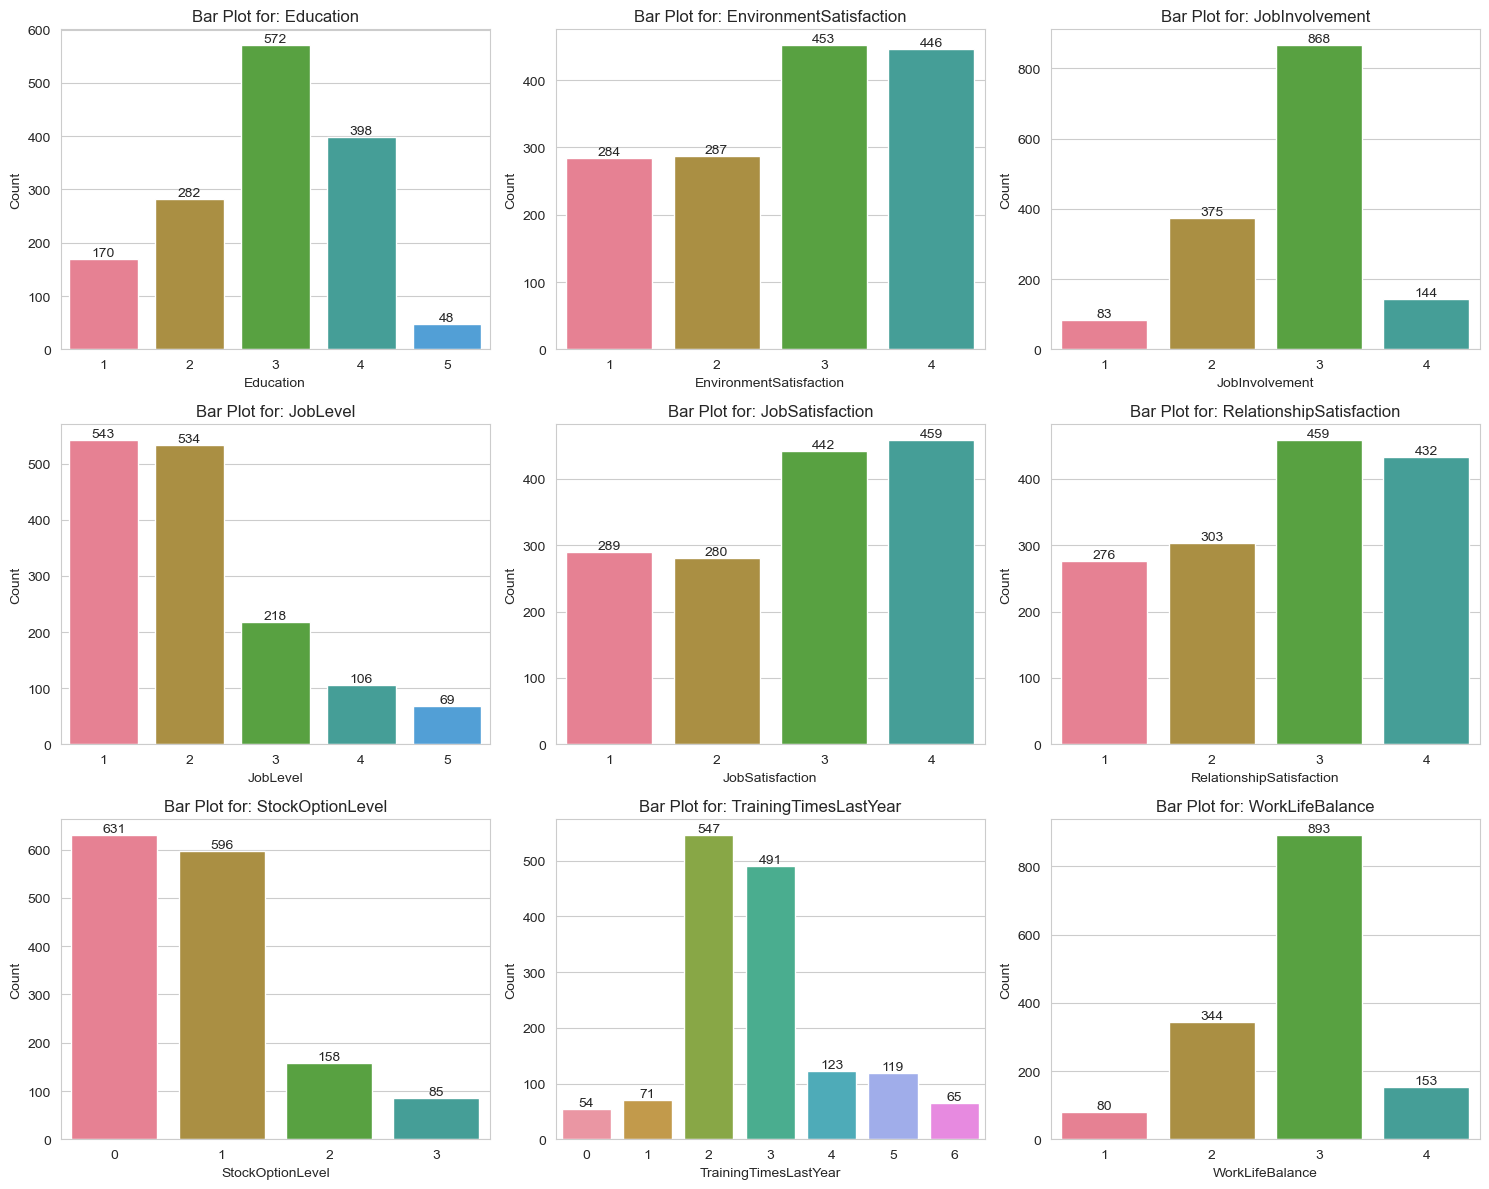

In [17]:
sns.set_style('whitegrid')
sns.set_palette('husl')

n = len(categorical_variables)  
ncols = 3  
nrows = (n + 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 4))
axes = axes.flatten()

for i, var in enumerate(categorical_variables):
    ax = sns.countplot(x=var, data=hr_data, ax=axes[i])
    axes[i].set_title(f'Bar Plot for: {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [18]:
dropped_columns = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18']
filtered_columns = [col for col in numerical_variables if col not in categorical_variables and col not in dropped_columns]

In [19]:
print(filtered_columns)

['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


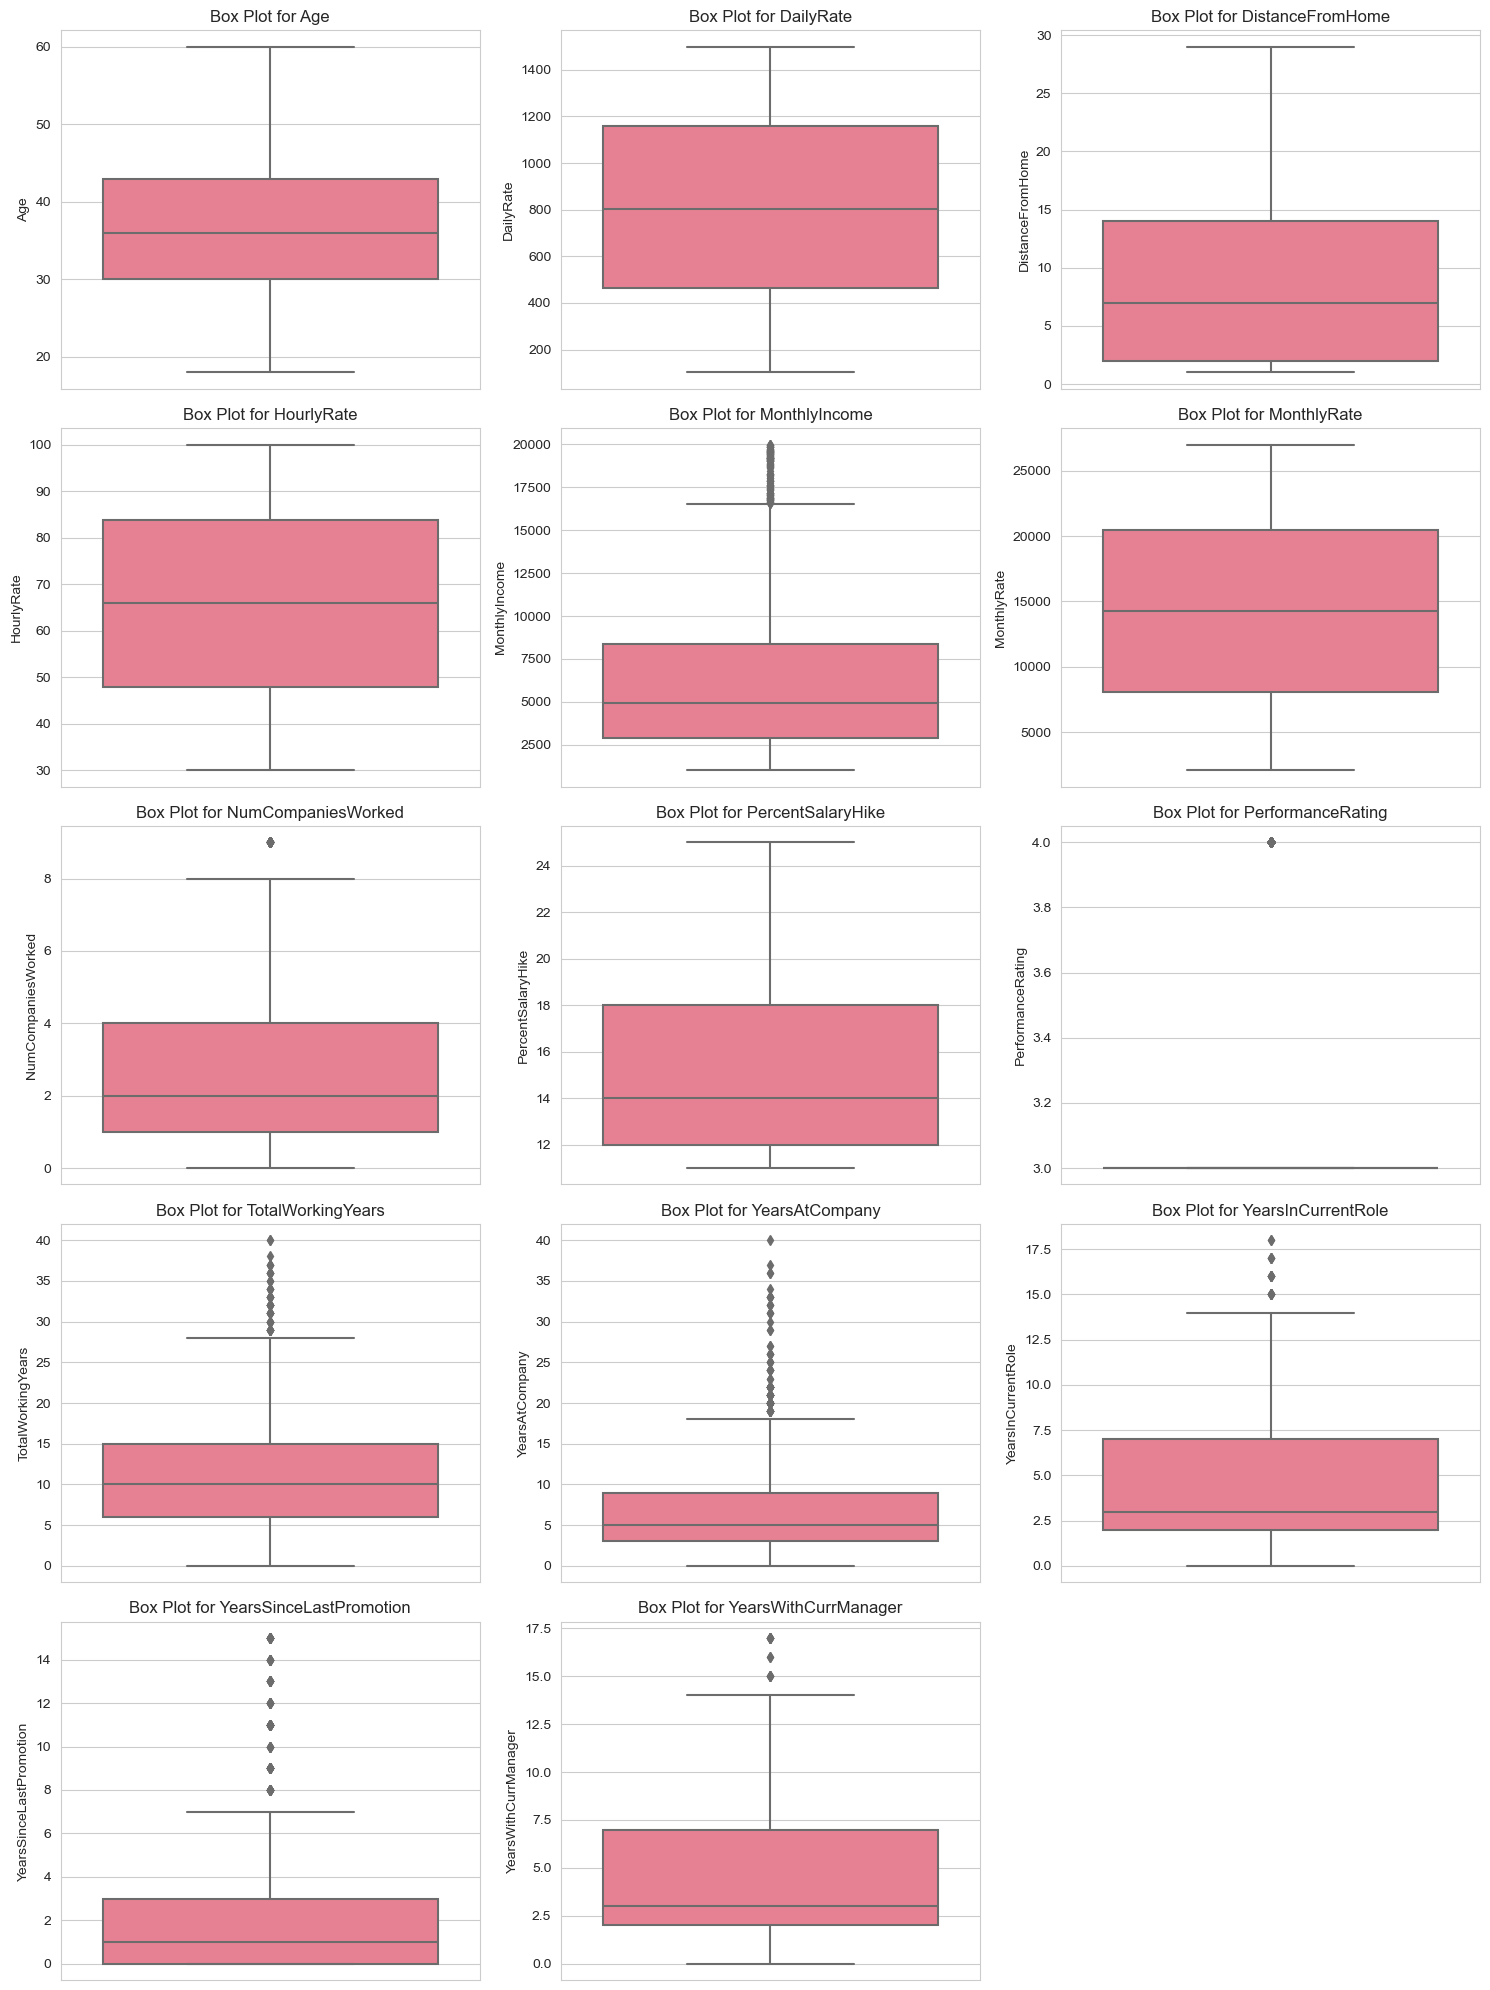

In [20]:
num_vars = len(filtered_columns)

fig, axes = plt.subplots(5, 3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(filtered_columns):
    sns.boxplot(data=hr_data, y=col, ax=axes[i])
    axes[i].set_title(f'Box Plot for {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

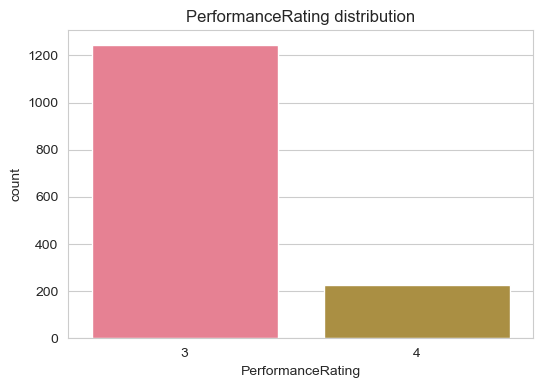

In [21]:
performance_rating_counts = hr_data['PerformanceRating'].value_counts()

plt.figure(figsize=(6,4))
sns.countplot(data=hr_data, x='PerformanceRating')
plt.title('PerformanceRating distribution')
plt.show

Data preparation summary:
- There is no missing values and duplicates in the dataset
- Outliers are shown in boxplot matrix - these are not an error data values. However for variables with outliers analysis on distribution should be carried out
- Four columns were dropped: 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'. Dataset consists of 30 columns
- No new features were compute
- Remaining explanatory variables can be categorize into 6 meaningful categories:
1. Demographics
- Age
- Gender
- MaritalStatus
- Education
- EducationField
2. Employment
- Department
- JobRole
- JobLevel
- BusinessTravel
- OverTime
3. Salary and Finance
- DailyRate
- HourlyRate
- MonthlyIncome
- MonthlyRate
- PercentSalaryHike
- StockOptionLevel
4. Satisfaction and Engagement
- JobSatisfaction
- EnvironmentSatisfaction
- RelationshipSatisfaction
- WorkLifeBalance
- JobInvolvement
- PerformanceRating
5. Work Experience
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager
- NumCompaniesWorked
6. Other Metrics
- DistanceFromHome
- TrainingTimesLastYear




Data analysis

What are the key characteristics of employees who have left the company?

Attrition variable distribution

Attrition
No     1233
Yes     237
Name: count, dtype: int64

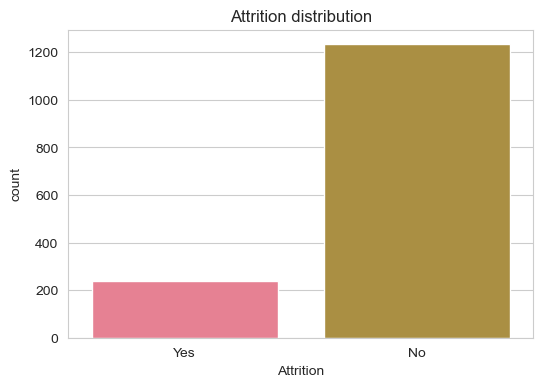

In [22]:
attrition_counts = hr_data['Attrition'].value_counts()

plt.figure(figsize=(6,4))
sns.countplot(data=hr_data, x='Attrition')
plt.title('Attrition distribution')
plt.show
attrition_counts

Desctriptive statistisc for employees who leaved company (numerical data)

In [23]:
attrition_yes = hr_data[hr_data['Attrition'] == 'Yes']
numerical_variables = attrition_yes.select_dtypes(include=['float64', 'int64']).columns
numeric_stats = attrition_yes[numerical_variables].agg(['count', 'mean', 'median', 'min', 'max', 'std', 'skew', 'kurt']).T
numeric_stats['range'] = numeric_stats['max'] - numeric_stats['min']
numeric_stats = numeric_stats[['count','mean', 'median', 'min', 'max', 'range', 'std', 'skew', 'kurt']]
numeric_stats


,count,mean,median,min,max,range,std,skew,kurt
Age,237.0,33.607595,32.0,18.0,58.0,40.0,9.689350,0.715732,-0.057044
DailyRate,237.0,750.362869,699.0,103.0,1496.0,1393.0,401.899519,0.234153,-1.134598
DistanceFromHome,237.0,10.632911,9.0,1.0,29.0,28.0,8.452525,0.635903,-0.860306
Education,237.0,2.839662,3.0,1.0,5.0,4.0,1.008244,-0.323647,-0.552558
EnvironmentSatisfaction,237.0,2.464135,3.0,1.0,4.0,3.0,1.169791,-0.008988,-1.479108
HourlyRate,237.0,65.573840,66.0,31.0,100.0,69.0,20.099958,0.051689,-1.152024
JobInvolvement,237.0,2.518987,3.0,1.0,4.0,3.0,0.773405,-0.479582,-0.324059
JobLevel,237.0,1.637131,1.0,1.0,5.0,4.0,0.940594,1.554019,2.126678
JobSatisfaction,237.0,2.468354,3.0,1.0,4.0,3.0,1.118058,-0.048493,-1.366772
MonthlyIncome,237.0,4787.092827,3202.0,1009.0,19859.0,18850.0,3640.210367,1.921147,4.181845


Desctriptive statistisc for employees whe leaved company (categorical data)

In [24]:
object_variables = attrition_yes.select_dtypes(include=['object']).columns.drop('Attrition')
categorical_stats = {} 
for var in object_variables:
    value_counts = attrition_yes[var].value_counts()
    percentages = attrition_yes[var].value_counts(normalize=True) * 100
    mode = attrition_yes[var].mode()[0]
    
    categorical_stats[var] = pd.DataFrame({
        'Count': value_counts,
        'Percentage': percentages,
        'Mode': [mode] * len(value_counts)
    })

for var, stats in categorical_stats.items():
    print(f"Statistics for {var}:")
    print(stats)
    print("\n")

Statistics for BusinessTravel:
                   Count  Percentage           Mode
BusinessTravel                                     
Travel_Rarely        156   65.822785  Travel_Rarely
Travel_Frequently     69   29.113924  Travel_Rarely
Non-Travel            12    5.063291  Travel_Rarely


Statistics for Department:
                        Count  Percentage                    Mode
Department                                                       
Research & Development    133   56.118143  Research & Development
Sales                      92   38.818565  Research & Development
Human Resources            12    5.063291  Research & Development


Statistics for EducationField:
                  Count  Percentage           Mode
EducationField                                    
Life Sciences        89   37.552743  Life Sciences
Medical              63   26.582278  Life Sciences
Marketing            35   14.767932  Life Sciences
Technical Degree     32   13.502110  Life Sciences
Other      

What is the attrition rate for different departments, employee groups, and job positions?

In [25]:
attrition_yes_count = attrition_yes.shape[0]
total_count = hr_data['Attrition'].count()

attrition_rate = round((attrition_yes_count/total_count) * 100,2)

attrition_rate

16.12

In [ ]:
attrition_rate_variables = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

for var in attrition_rate_variables:
    rate = hr_data.groupby(var)['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100)
    rate_sorted = rate.sort_values(ascending=False)
    print(f"Attrition Rate for {var}:")
    print(rate_sorted)
    print("\n" + "-"*40 + "\n")  

Attrition Rate for Department:
Department
Sales                     20.627803
Human Resources           19.047619
Research & Development    13.839750
Name: Attrition, dtype: float64

----------------------------------------

Attrition Rate for EducationField:
EducationField
Human Resources     25.925926
Technical Degree    24.242424
Marketing           22.012579
Life Sciences       14.686469
Medical             13.577586
Other               13.414634
Name: Attrition, dtype: float64

----------------------------------------

Attrition Rate for Gender:
Gender
Male      17.006803
Female    14.795918
Name: Attrition, dtype: float64

----------------------------------------

Attrition Rate for JobRole:
JobRole
Sales Representative         39.759036
Laboratory Technician        23.938224
Human Resources              23.076923
Sales Executive              17.484663
Research Scientist           16.095890
Manufacturing Director        6.896552
Healthcare Representative     6.870229
Manager     

- What factors increase and the probability of employee attrition?
- What factors decrease the probability of employee attrition?

Factors were divided into categories based on their subject matter:  Demographics, Salary and Finance, Satisfaction and Engagement, Employment and Work Experience

Demographic factors

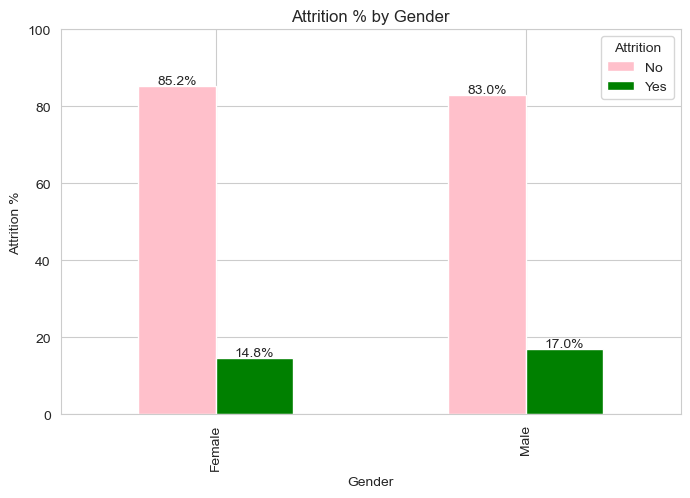

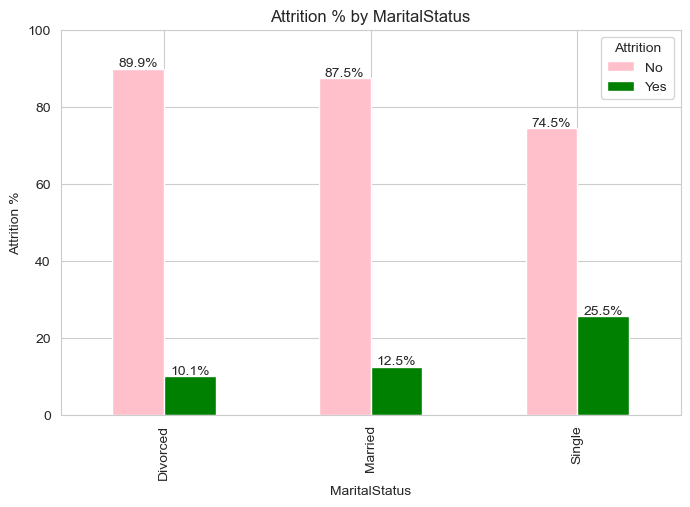

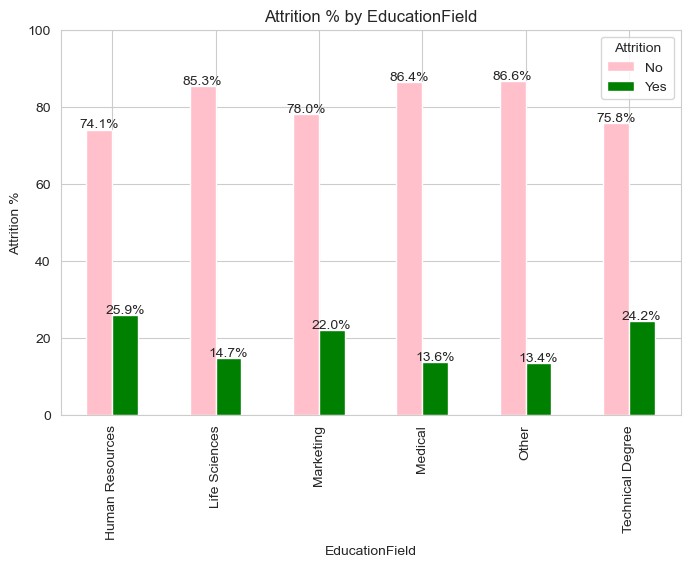

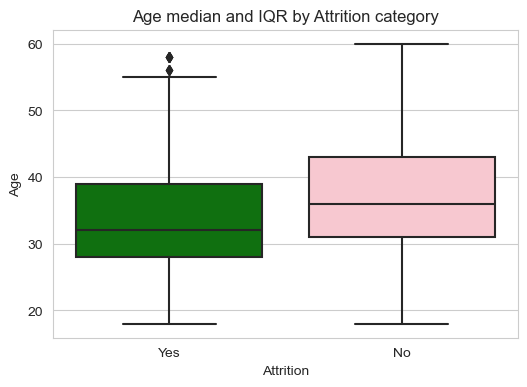

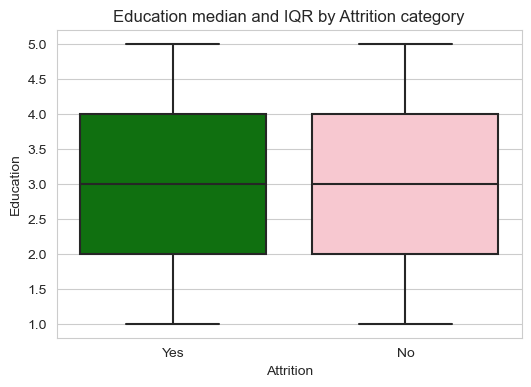

In [27]:
palette = {'Yes': 'green', 'No': 'pink'}

demographic_cat_factors = ['Gender', 'MaritalStatus', 'EducationField']
demographic_num_factors = ['Age', 'Education']

for var in demographic_cat_factors:
    attrition_percentage = hr_data.groupby([var, 'Attrition']).size().unstack().apply(lambda x: (x / x.sum()) * 100, axis=1)
    
    plt.figure(figsize=(8, 5))
    bars = attrition_percentage.plot(kind='bar', stacked=False, ax=plt.gca(), color=['pink', 'green'])

    for patch in bars.patches:
        height = patch.get_height()
        width = patch.get_width()
        x = patch.get_x() + width / 2  # Środek słupka
        y = height + 0.5  # Lekko nad słupkiem
        plt.text(x, y, f'{height:.1f}%', ha='center')

    plt.title(f'Attrition % by {var}')
    plt.ylabel('Attrition %')
    plt.xlabel(var)
    plt.ylim(0, 100)
    plt.show()



for var in demographic_num_factors:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=hr_data, x='Attrition', y=var, palette=palette)
    plt.title(f'{var} median and IQR by Attrition category')
    plt.show()


Salary and finance factors

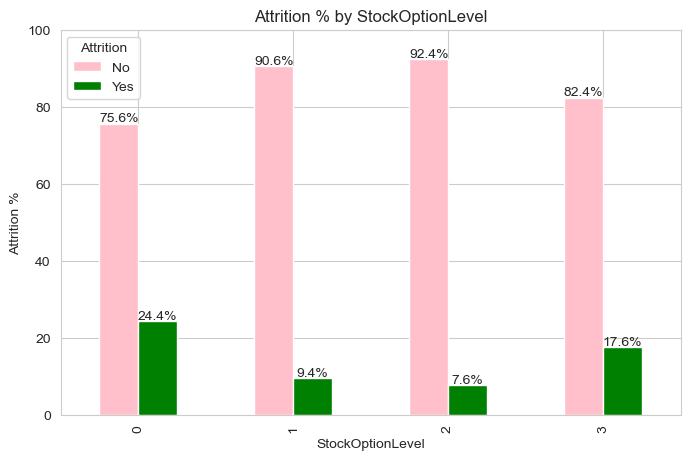

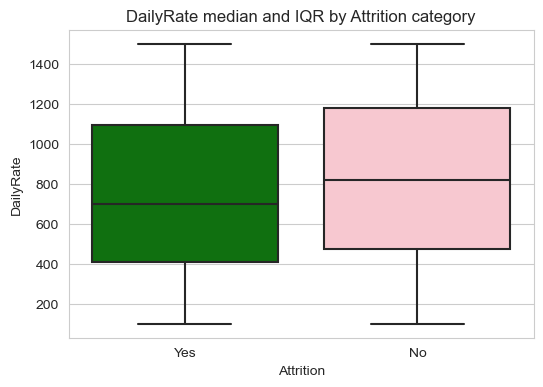

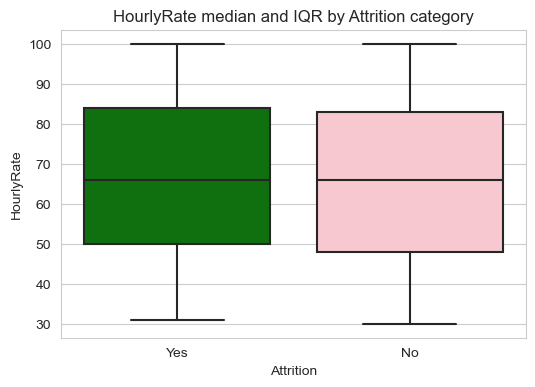

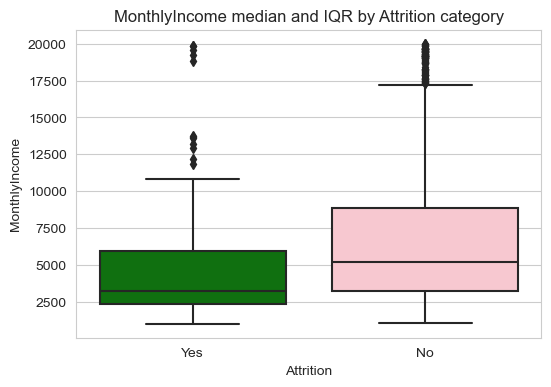

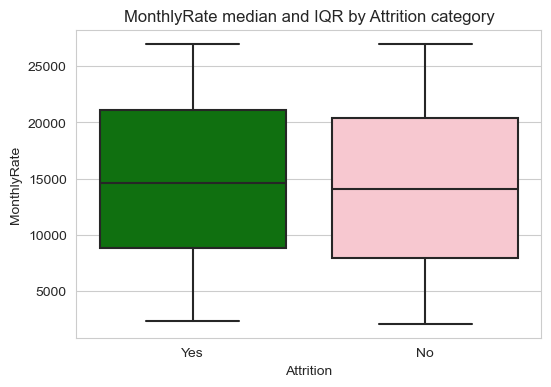

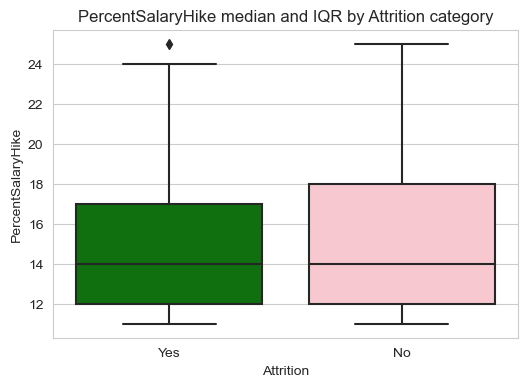

In [28]:
palette = {'Yes': 'green', 'No': 'pink'}

demographic_cat_factors = ['StockOptionLevel']
demographic_num_factors = ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike']

for var in demographic_cat_factors:
    attrition_percentage = hr_data.groupby([var, 'Attrition']).size().unstack().apply(lambda x: (x / x.sum()) * 100, axis=1)
    
    plt.figure(figsize=(8, 5))
    bars = attrition_percentage.plot(kind='bar', stacked=False, ax=plt.gca(), color=['pink', 'green'])

    for patch in bars.patches:
        height = patch.get_height()
        width = patch.get_width()
        x = patch.get_x() + width / 2  # Środek słupka
        y = height + 0.5  # Lekko nad słupkiem
        plt.text(x, y, f'{height:.1f}%', ha='center')

    plt.title(f'Attrition % by {var}')
    plt.ylabel('Attrition %')
    plt.xlabel(var)
    plt.ylim(0, 100)
    plt.show()



for var in demographic_num_factors:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=hr_data, x='Attrition', y=var, palette=palette)
    plt.title(f'{var} median and IQR by Attrition category')
    plt.show()

Satisfaction and engagement factors

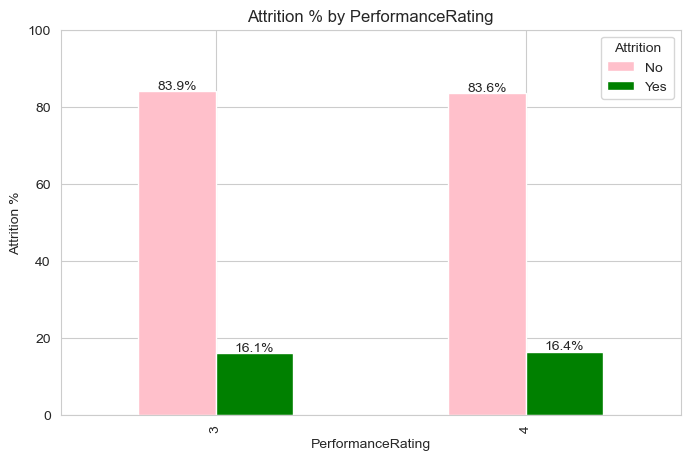

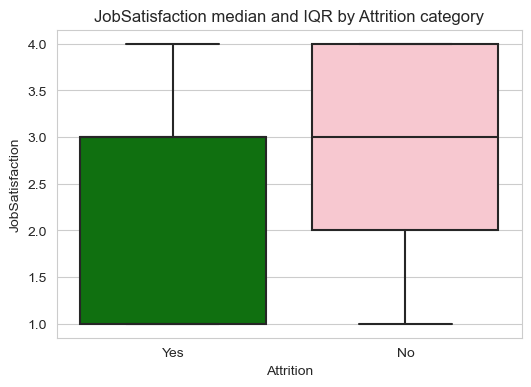

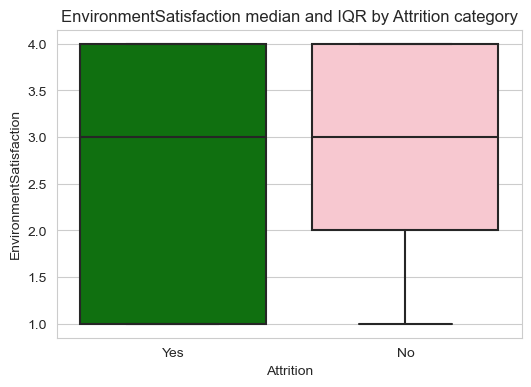

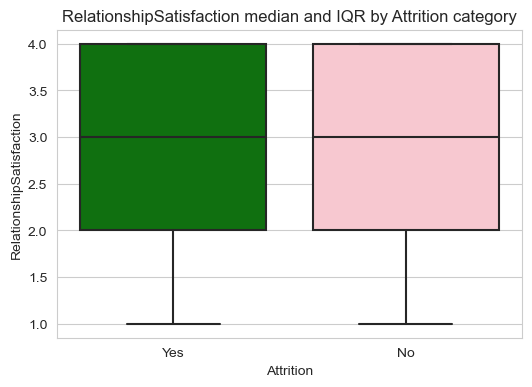

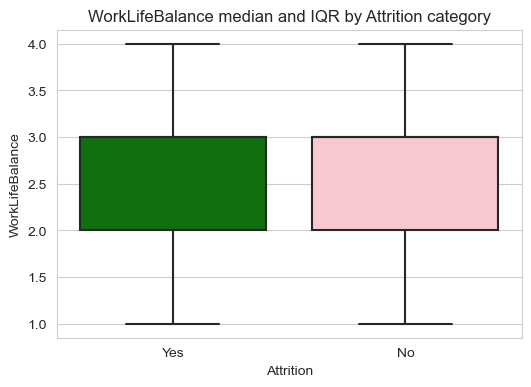

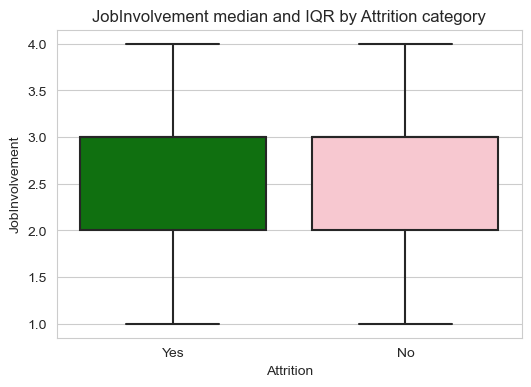

In [29]:
palette = {'Yes': 'green', 'No': 'pink'}

demographic_cat_factors = ['PerformanceRating']
demographic_num_factors = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance', 'JobInvolvement']

for var in demographic_cat_factors:
    attrition_percentage = hr_data.groupby([var, 'Attrition']).size().unstack().apply(lambda x: (x / x.sum()) * 100, axis=1)
    
    plt.figure(figsize=(8, 5))
    bars = attrition_percentage.plot(kind='bar', stacked=False, ax=plt.gca(), color=['pink', 'green'])

    for patch in bars.patches:
        height = patch.get_height()
        width = patch.get_width()
        x = patch.get_x() + width / 2  # Środek słupka
        y = height + 0.5  # Lekko nad słupkiem
        plt.text(x, y, f'{height:.1f}%', ha='center')

    plt.title(f'Attrition % by {var}')
    plt.ylabel('Attrition %')
    plt.xlabel(var)
    plt.ylim(0, 100)
    plt.show()



for var in demographic_num_factors:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=hr_data, x='Attrition', y=var, palette=palette)
    plt.title(f'{var} median and IQR by Attrition category')
    plt.show()

Employment and work experience factors

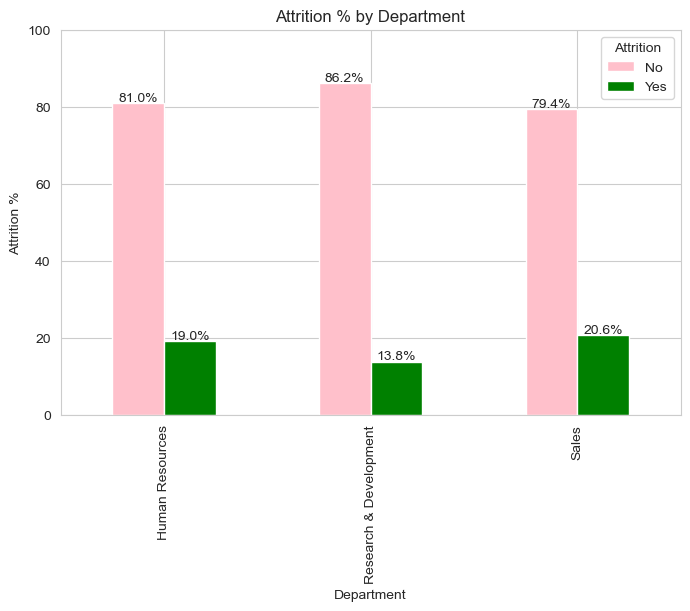

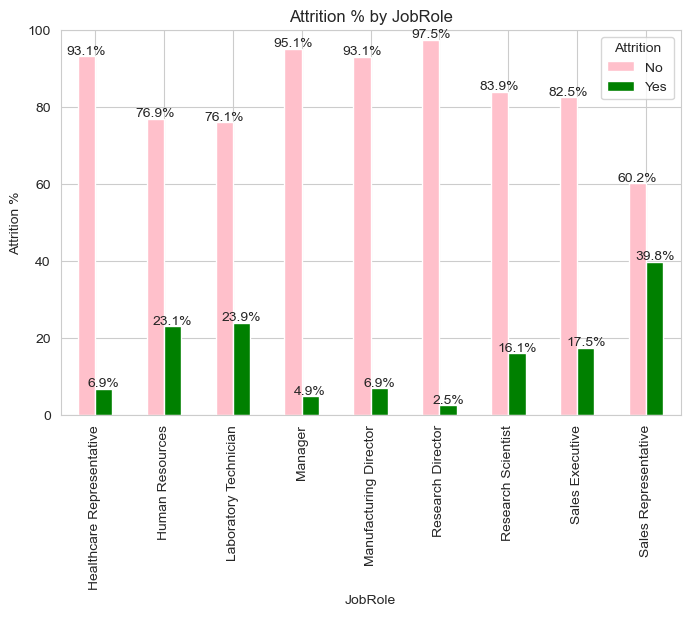

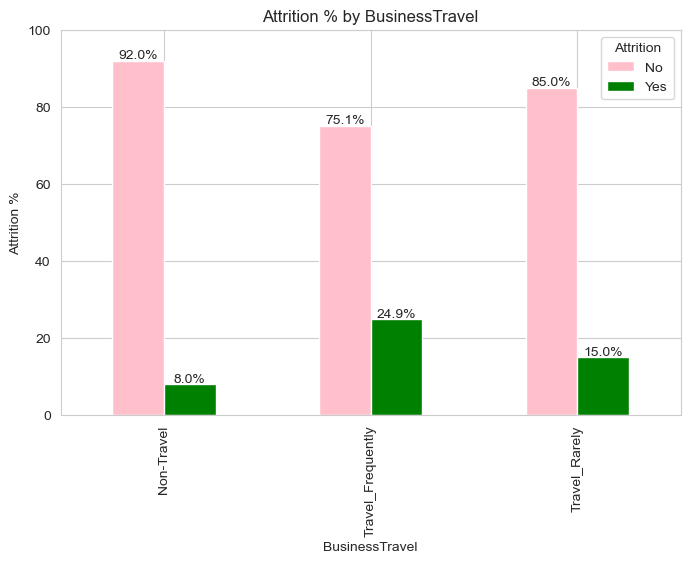

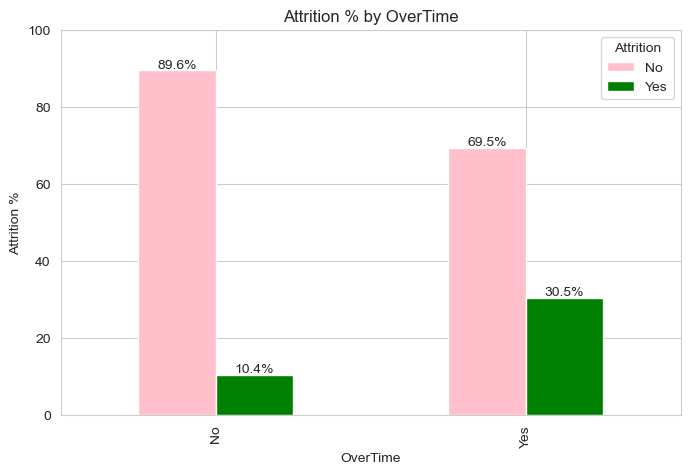

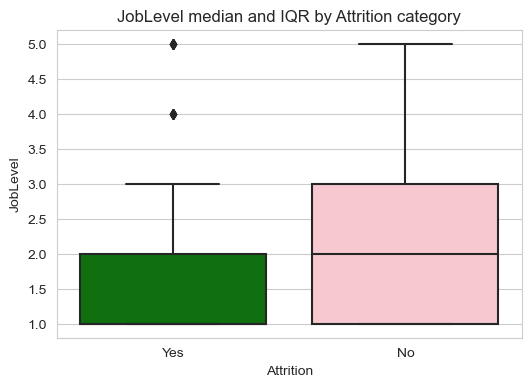

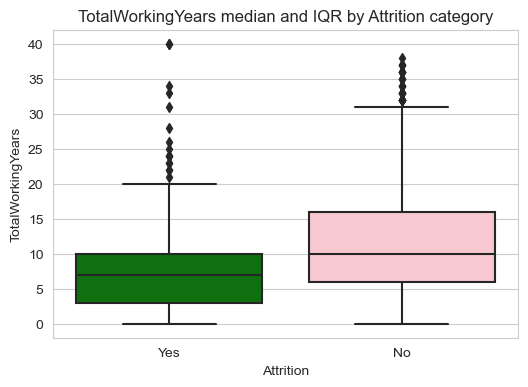

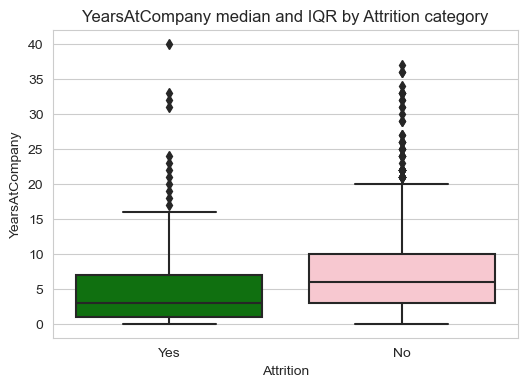

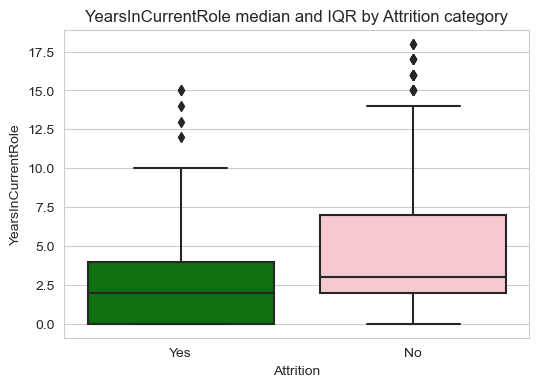

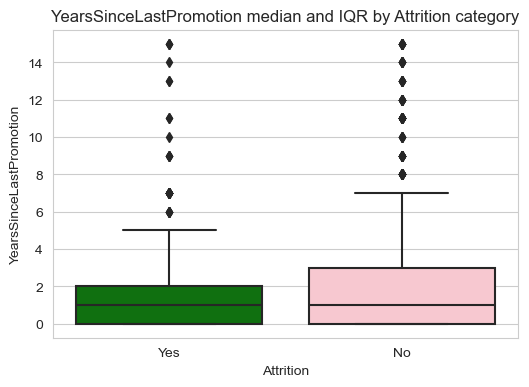

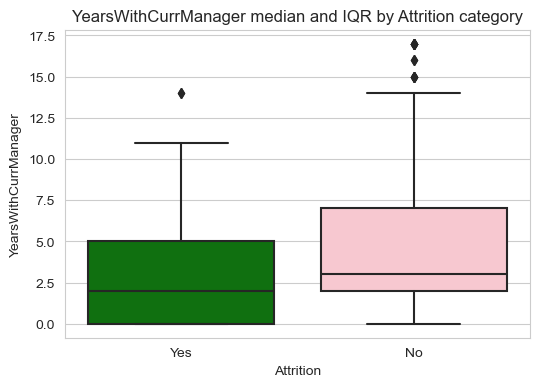

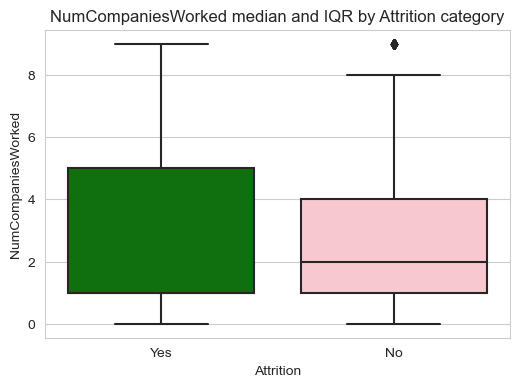

In [30]:
palette = {'Yes': 'green', 'No': 'pink'}

demographic_cat_factors = ['Department', 'JobRole', 'BusinessTravel', 'OverTime']
demographic_num_factors = ['JobLevel', 'TotalWorkingYears', 'YearsAtCompany', 
                           'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'NumCompaniesWorked']

for var in demographic_cat_factors:
    attrition_percentage = hr_data.groupby([var, 'Attrition']).size().unstack().apply(lambda x: (x / x.sum()) * 100, axis=1)
    
    plt.figure(figsize=(8, 5))
    bars = attrition_percentage.plot(kind='bar', stacked=False, ax=plt.gca(), color=['pink', 'green'])

    for patch in bars.patches:
        height = patch.get_height()
        width = patch.get_width()
        x = patch.get_x() + width / 2  # Środek słupka
        y = height + 0.5  # Lekko nad słupkiem
        plt.text(x, y, f'{height:.1f}%', ha='center')

    plt.title(f'Attrition % by {var}')
    plt.ylabel('Attrition %')
    plt.xlabel(var)
    plt.ylim(0, 100)
    plt.show()



for var in demographic_num_factors:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=hr_data, x='Attrition', y=var, palette=palette)
    plt.title(f'{var} median and IQR by Attrition category')
    plt.show()

Correlations between Attrition and explanatory variables (numeric) - Spearmann correlation

Changing Attrition variable to numeric values

In [31]:
hr_data['Attrition_numeric'] = hr_data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

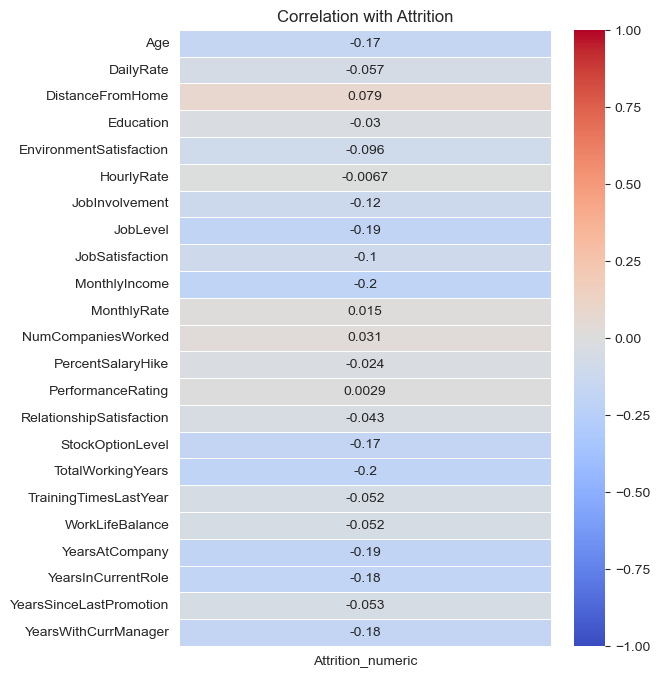

In [32]:
numeric_hr_data = hr_data.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_hr_data.corr(method='spearman')

attrition_corr = correlation_matrix[['Attrition_numeric']].drop('Attrition_numeric')

plt.figure(figsize=(6, 8))
sns.heatmap(attrition_corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation with Attrition')
plt.show()

Correlations between Attrition and explanatory variables (object) - Kendall coefficient

Encoding object variables (LabelEncoder)

In [33]:
from sklearn.preprocessing import LabelEncoder

categorical_vars = hr_data.select_dtypes(include=['object']).columns.drop('Attrition')

hr_data_encoded = hr_data.copy()
for var in categorical_vars:
    le = LabelEncoder()
    hr_data_encoded[var] = le.fit_transform(hr_data_encoded[var])


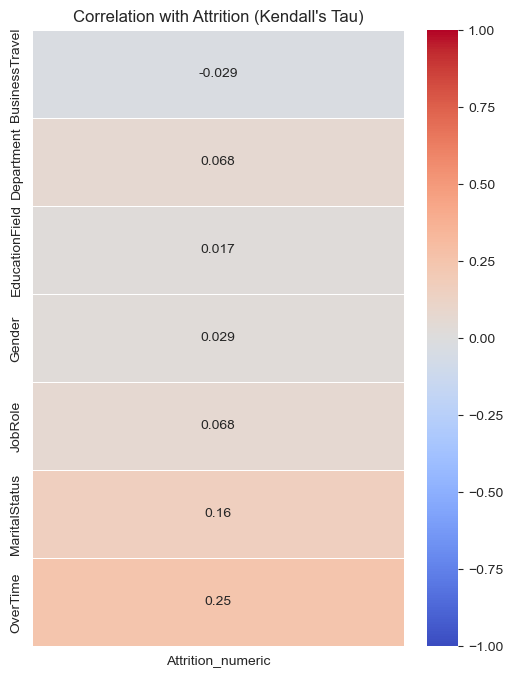

In [34]:
correlation_matrix_kendall = hr_data_encoded[['Attrition_numeric'] + list(categorical_vars)].corr(method='kendall')

attrition_corr_kendall = correlation_matrix_kendall[['Attrition_numeric']].drop('Attrition_numeric')

plt.figure(figsize=(6, 8))
sns.heatmap(attrition_corr_kendall, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation with Attrition (Kendall\'s Tau)')
plt.show()

In [35]:
for column in filtered_columns:
    group1 = hr_data[hr_data['Attrition'] == 'Yes'][column]
    group2 = hr_data[hr_data['Attrition'] == 'No'][column]

    mean_group1 = group1.mean()
    mean_group2 = group2.mean()

    t_stat, p_value = ss.ttest_ind(group1, group2, equal_var=False)

    print(f"Variable: {column}")
    print(f"Mean for Attrition = Yes: {mean_group1: .2f}")
    print(f"Mean for Attrition = No: {mean_group2: .2f}")
    print(f"Wartość t: {t_stat: .2f}")
    print(f"Wartość p: {p_value: .4f}")
    print("\n" + "-"*50 + "\n")

Variable: Age
Mean for Attrition = Yes:  33.61
Mean for Attrition = No:  37.56
Wartość t: -5.83
Wartość p:  0.0000

--------------------------------------------------

Variable: DailyRate
Mean for Attrition = Yes:  750.36
Mean for Attrition = No:  812.50
Wartość t: -2.18
Wartość p:  0.0300

--------------------------------------------------

Variable: DistanceFromHome
Mean for Attrition = Yes:  10.63
Mean for Attrition = No:  8.92
Wartość t:  2.89
Wartość p:  0.0041

--------------------------------------------------

Variable: HourlyRate
Mean for Attrition = Yes:  65.57
Mean for Attrition = No:  65.95
Wartość t: -0.26
Wartość p:  0.7914

--------------------------------------------------

Variable: MonthlyIncome
Mean for Attrition = Yes:  4787.09
Mean for Attrition = No:  6832.74
Wartość t: -7.48
Wartość p:  0.0000

--------------------------------------------------

Variable: MonthlyRate
Mean for Attrition = Yes:  14559.31
Mean for Attrition = No:  14265.78
Wartość t:  0.58
Wartość p

Which specific employees are at high risk of leaving their jobs?

To answer this research question, it will be necessary to develop a ml model that predicts the probability of an employee attrition.

Key insights and conclusions:

1. ETL process:
- The 'PerformanceRating' variable exhibits poor differentiation among employees in terms of performance evaluation. The company's performance evaluation process should be reviewed and improved.
- Additional time-series variables (e.g. date of employment, date of attrition) should be collected. This will allow for time series analysis to investigate trends and seasonality.
- The analysis should incorporate additional variables that depict the labor market landscape (e.g., industry-specific unemployment rates, job vacancy rates for different positions). These variables are likely to exert a substantial influence on attrition rate.

2. What are the key characteristics of employees who have left the company?
- Age:
The average age of employees who left the company is 33.6 years, with a median of 32.
The age distribution is slightly skewed towards younger employees (skewness = 0.71), indicating that younger employees tend to leave more often.
- Daily Rate:
The average daily rate for employees who left is 750.
There is no significant skew in the daily rate distribution, meaning employees across different daily rates leave, but it is fairly centered around the median value of 699.
- Distance From Home:
The average distance from home for employees who left is around 10.6 km, with a median of 9 km.
The skewness (0.63) indicates that employees living slightly further from work are more likely to leave.
- Education:
The mean and median education level are both around 3, which corresponds to a higher education level (e.g., a bachelor’s degree).
Most employees who leave are well-educated, but there’s no significant skewness here (-0.32).
- Monthly Income:
The average monthly income for employees who left is 4,787 units, with a large range (from 1,009 to 19,859), indicating that both lower and higher-income employees leave.
The distribution is highly skewed (skewness = 1.92), with many employees earning significantly less than the top earners.
- Work-Related Characteristics:
Job Role: The most common roles among employees who left are Laboratory Technician (26%), followed by Sales Executive (24%) and Research Scientist (19.8%).
Business Travel: 65.8% of employees who left travel rarely, while 29.1% travel frequently. This suggests that frequent travel may be a factor contributing to attrition.
Overtime: More than half (53.6%) of the employees who left worked overtime.
Marital Status: 50.6% of employees who left are single, which may suggest that single employees are at higher risk of leaving compared to married or divorced employees.
- Tenure and Job Satisfaction:
Years at Company: Employees who leave tend to have shorter tenures, with an average of 5.13 years.
Job Satisfaction: The average job satisfaction of those who left is 2.47 (out of 4), suggesting that lower job satisfaction could be a contributing factor.
- Work-Life Balance: 
The average work-life balance score for employees who left is 2.66, indicating that work-life balance might be a moderate issue for employees who leave.
- 56% of employees who terminated their employment were employed in the Research and Development department, 37% had a degree in life sciences, 63% were male, and nearly 51% were single. The analysis did not reveal a significant impact of overtime work on the decision to leave the company. The most common roles among departing employees were laboratory technicians (26%), sales representatives (24%), and research scientists (nearly 20%).
- More detailed characteristics of employees who left the company can be found in the tables above. 
    - Interpretation of skewness: If skewness is greater than 1 or less than -1, it indicates a highly skewed distribution. In such a situation, the distribution has a significant deviation from symmetry, and therefore, the median is a more reliable measure of central tendency as it is less sensitive to outliers than the mean. A positive skewness value indicates that most former employees have a value of the variable lower than the mean. A negative skewness value, on the other hand, indicates that for most former employees, the value of the given variable is higher than the mean. 
    - Interpretation of kurtosis: A high kurtosis value (above 3) indicates that most values of the given variable are concentrated close to the mean, but there are also a few very large (or small) deviations. For example, in the case of the variable YearsSinceLastPromotion (kurtosis = 4.86), we are dealing with employees who, for the most part, have a short period since their last promotion (approximately 1-3 years), but there are also employees who have not been promoted for a long time (up to 15 years). These extreme cases may have contributed to leaving the company. Low kurtosis indicates that the variable does not have many outliers, and former employees have more uniform values of this variable. For example, the variable Education (kurtosis = -0.55) has values that are more evenly distributed, which means that the education level of employees who left does not deviate significantly from the mean.

3. What is the attrition rate for different departments, employee groups, and job positions?
- The avarage attrition rate for the entire company is 16.12 %.
- The attrition rate is higher than average for: 
    - Sales Department (20.6 %) and HR Department (19 %)
    - HR (26 %), Technical (24.2 %) and Marketing (22 %) education field
    - Males (17 % - not significant difference)
    - Sales Representative (almost 40 %), Laboratory Technician (24 %) and HR (23 %) job roles
    - Single marital status (25.5 %)

4. What factors increase/decrease the probability of employee attrition?
- Demographic: 
    - Marital status: single individuals were more likely to leave the company. 
    - Education field: employees with HR and technical backgrounds had the highest attrition rates. 
    - Age: younger employees tended to leave more frequently than older ones.
- Salary and finance:
    - Employees with lower monthly earnings were more likely to leave. 
- Satisfaction and engagedment 
    - Job satisfaction was identified as a key factor influencing the decision to leave. Other variables in this area were found to be less significant. 
- Employment and work experience:
    - The sales and HR departments had the highest attrition rates. 
    - Sales representatives and laboratory technicians were particularly affected. 
    - Overtime work also had a significant impact on attrition, with 30% of employees who worked overtime leaving the company.
- The highest correlation coefficients were found between 'Attrition' and 'OverTime', 'MaritalStatus', and 'MonthlyIncome'. However, these correlations were weak.
- Based on mean comparison for different groups (attrition yes/no):
    - The average age of employees who left the company was 33.61 years, while the average age of those who remained was 37.56 years.
    - Employees who left the company had an average commute of 1.7 miles longer.
    - Employees who left the company had 3.6 years less total work experience and 2.2 years less work experience with the company. Additionally, they had been in their current position and under their current manager for an average of 1.5 years less.


Recommendation for further analysis:
- PCA on six separate categories of variables: Demographics, Employment, Salary and Finance, Satisfaction and Engagement, Work Experience, Other Metrics. In this case, the PCA results for each group would represent the main patterns within that specific group of variables, which could make the interpretation easier. 
- Scoring model to estimate the probability of employee attrition as well as to identify which variables influence the probability of attrition most (e.g. Logistic Regression, Decision Trees, Random Forest)
- Time series analysis to investigate trends and seasonal patterns in employee attrition. However, this type of analysis requires collecting additional time-series variables. 

